In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
seeds=pd.read_csv('seeds_dataset.txt', delimiter='\t' )

In [4]:
seeds.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [5]:
colnames=['Area','Perimeter', 'Compactness', 'Length of kernel','Width of kernel', 
          'Asymmetry coefficient','Length kernel groove','target']

In [6]:
seeds.columns=colnames
seeds.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length kernel groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


Check whether dataset more in details to find out whether to clean it further

In [7]:
seeds.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length kernel groove,target
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,14.845550,14.557943,0.870999,5.627890,3.258349,3.707278,5.408971,2.004785
std,2.916545,1.308949,0.023686,0.444029,0.378603,1.503657,0.492487,0.817463
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.260000,13.450000,0.856700,5.262000,2.941000,2.587000,5.045000,1.000000
50%,14.340000,14.290000,0.873500,5.520000,3.232000,3.600000,5.224000,2.000000
75%,17.320000,15.730000,0.887900,5.980000,3.562000,4.773000,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [8]:
seeds.dtypes

Area                     float64
Perimeter                float64
Compactness              float64
Length of kernel         float64
Width of kernel          float64
Asymmetry coefficient    float64
Length kernel groove     float64
target                     int64
dtype: object

In [9]:
nullvalues = seeds.isnull().sum().sort_values(ascending=False)
nullvalues

Area                     0
Perimeter                0
Compactness              0
Length of kernel         0
Width of kernel          0
Asymmetry coefficient    0
Length kernel groove     0
target                   0
dtype: int64

Exploratory Data Analysis

In [10]:
print(seeds['target'].unique())

[1 2 3]


Let's first analyse the distribution of the target variable to find out whether the observations are
equally distributed amongst the three classes 

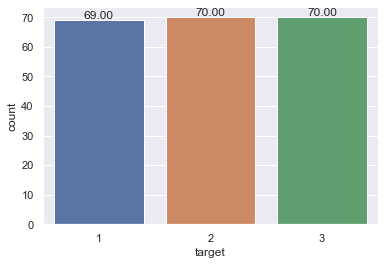

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x="target", data=seeds)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [12]:
seeds.groupby('target').mean()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length kernel groove
target,,,,,,,
1,14.321014,14.286377,0.880201,5.504362,3.243652,2.673872,5.08529
2,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.02060
3,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.11640


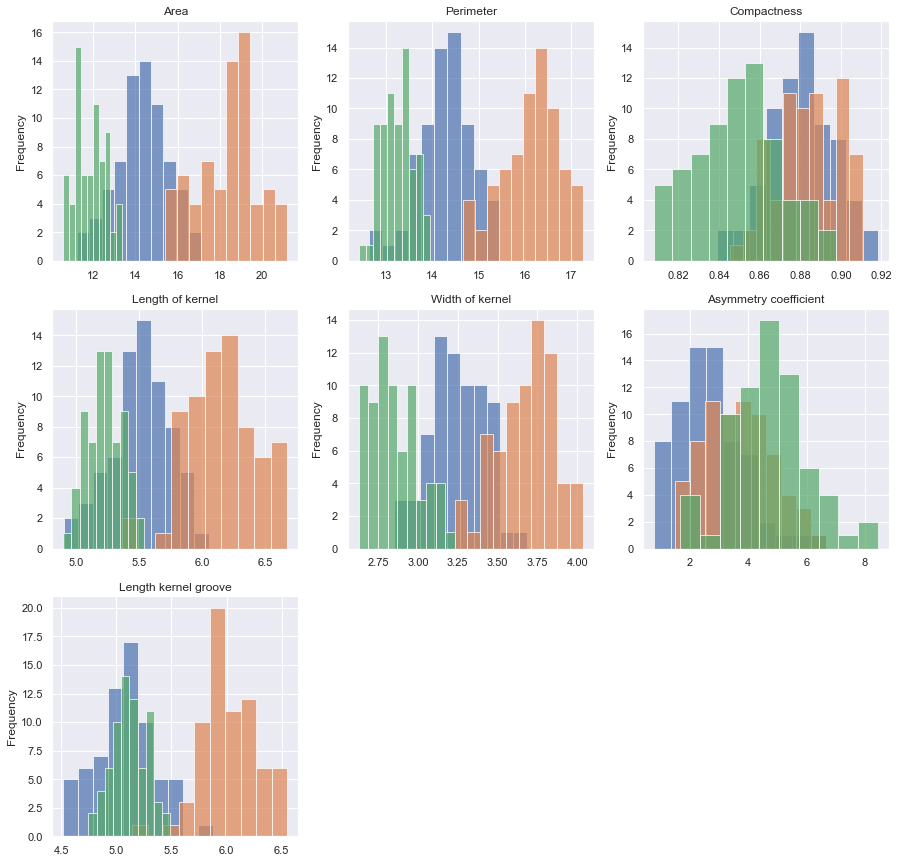

In [13]:
fig = plt.figure(figsize=(15,15))


cols = [x for x in seeds.columns if x !='target']
plots= [x for x in range(0, len(cols))]
for i in range(len(cols)):
    plots[i]= fig.add_subplot(3,3,i+1)
    
for i in range(len(plots)):
    plots[i].hist(seeds[seeds.target==1][cols[i]], alpha=0.7)
    plots[i].hist(seeds[seeds.target==2][cols[i]], alpha=0.7)
    plots[i].hist(seeds[seeds.target==3][cols[i]], alpha=0.7)
    plots[i].set_title(cols[i])
    plots[i].set_ylabel('Frequency')

Let's implement three classification models to and figure which one wuld help us to improve the score:

1) Neural Network

2) Support Vectorn Machine

3) Random Forest


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [15]:
Y = seeds['target']
x = seeds.drop('target', axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)
X = scaler.transform(x)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

We are now going to use GridsearchCV for hyperparameters tuning

In [18]:
#Neural Networks

parameters = {'solver':['sgd','lbfgs', 'adam'],'activation': ['logistic', 'tanh', 'relu'],
              'alpha': [ 0.1 , 0.01 , 0.001 , 0.0001],'hidden_layer_sizes': np.arange(12, 18)
             }
gridcv = GridSearchCV(MLPClassifier(random_state=42),parameters,verbose=1, cv=6)

In [19]:
# Support Vector Machine
parameters = {'kernel':('linear', 'rbf', 'poly','sigmoid'), 'C': [1, 10, 100, 1000]}
classifier = SVC(random_state=42)
gridsvm = GridSearchCV(classifier, parameters, cv=6)

In [20]:
#Random Forest

params = {'max_depth': [10,30,50, 70,100, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'n_estimators': [100,500,1000, 1500, 2000]}
          
gridRF = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)

Let's fit the three GridSearchCV models to the entire dataset

In [21]:
# gridcv.fit(X,Y)

In [22]:
# gridsvm.fit(X,Y)

In [23]:
# gridRF.fit(X,Y)

Best results of the hyperparameter tuning that we can use to implement the alogorithms

In [24]:
# print(gridcv.best_score_)
# print('#################')
# print(gridcv.best_params_)

In [25]:
# print(gridsvm.best_score_)
# print('#################')
# print(gridsvm.best_params_)

In [26]:
# print(gridRF.best_score_)
# print('#################')
# print(gridRF.best_params_)

Implementation of the algorithms

In [27]:
#neural_network
nnt = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(12,), solver='lbfgs')

#Support Vector Machine
svm = SVC(kernel="linear", C=100, probability=True)

#Random Forest
rf = RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=1,n_estimators=100)

In [28]:
models=[nnt, svm, rf]
names=['Neural Network', 'Support Vector', 'Random Forest']

In [29]:
model_range = [x for x in range(0, len(models))]
fit_models = model_range.copy()
predictions_train = model_range.copy()
predictions_test = model_range.copy()

for i in range(len(models)):

    # Fit the models of training set
    fit_models[i]=models[i].fit(X_train,y_train)
    predictions_train[i]=fit_models[i].predict(X_train)
    predictions_test[i]=fit_models[i].predict(X_test)
    
    print('Classification Report for model', names[i])
    print(classification_report(y_test, predictions_test[i]))  
    print()
    print('accuracy_score on test set for model', names[i],'is: ',round(accuracy_score(y_test, predictions_test[i]),3),
         ' while accuracy_score on train set is: ', round(accuracy_score(y_train, predictions_train[i]),3))
    print('______________________________________________________________________________________')
    

Classification Report for model Neural Network
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       1.00      0.87      0.93        15
           3       0.94      1.00      0.97        17

    accuracy                           0.93        42
   macro avg       0.92      0.92      0.92        42
weighted avg       0.93      0.93      0.93        42


accuracy_score on test set for model Neural Network is:  0.929  while accuracy_score on train set is:  1.0
______________________________________________________________________________________
Classification Report for model Support Vector
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00        15
           3       0.89      1.00      0.94        17

    accuracy                           0.95        42
   macro avg       0.96      0.93      0.94        42
weig

In [30]:
def aucscoremulticlass(model, X_set, y_set):
    y_prob = model.predict_proba(X_set)
    macro_roc_auc_ovo = roc_auc_score(y_set, y_prob, multi_class="ovo",
                                  average="macro")
    weighted_roc_auc_ovo = roc_auc_score(y_set, y_prob, multi_class="ovo",
                                     average="weighted")
    macro_roc_auc_ovr = roc_auc_score(y_set, y_prob, multi_class="ovr",
                                  average="macro")
    weighted_roc_auc_ovr = roc_auc_score(y_set, y_prob, multi_class="ovr",
                                     average="weighted")
    print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [31]:
for i in range(len(models)):
    print(names[i])
    aucscoremulticlass(models[i], X_test, y_test)
    print('_______________________________________')

Neural Network
One-vs-One ROC AUC scores:
0.987451 (macro),
0.988375 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.988272 (macro),
0.990446 (weighted by prevalence)
_______________________________________
Support Vector
One-vs-One ROC AUC scores:
0.986863 (macro),
0.987570 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.988002 (macro),
0.989077 (weighted by prevalence)
_______________________________________
Random Forest
One-vs-One ROC AUC scores:
0.992157 (macro),
0.992437 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.992696 (macro),
0.993214 (weighted by prevalence)
_______________________________________


In this example, all the tree models seem to have a good results, hence picking one or the other very much depends
on several considerations:
    1) What is good score for the business owners?
    2) Which model is going to be more easily explainable to non-business people?
    
For the sake of this analysis, I assume that ti is core that all the three classeS of the target varible are
predicted correctly, hence I would choose the Support Vector given that it is the one with the best accuracy for 
all the three classes, along with having good score for the AUC

## Data Engineer test section

For the sake of this test, we want to extract the random forest model by serializing it into python pickle format.

You are tasked with:

* Create a python Flask application with a `/predict` route
* Import the `pickle` model into this new application
* The `/predict` route will read the input for the prediction from a JSON in the request body. This is the payload of the request:

    [
        {
            "Asymmetry coefficient": 1.018,
            "Perimeter": 14.57,
            "Length of kernel": 5.554,
            "Compactness": 0.8811,
            "Area": 14.88,
            "Length kernel groove": 4.956,
            "Width of kernel": 3.333
        },
        {
            "Asymmetry coefficient": 4.972,
            "Perimeter": 14.89,
            "Length of kernel": 5.776,
            "Compactness": 0.8823,
            "Area": 15.56,
            "Length kernel groove": 5.847,
            "Width of kernel": 3.408
        }
    ]

* Deserialize the model and use its `predict` function to predict the `Y` of the input in the request explained earlier.
* Hint: you will actually need two pickle models, the first is a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) that you need to use to scale the onput features, using `scaler.transform()` and the second is the actual [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), that will return the prediction using the [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict) method
* You will find the pickles in this repository. Here is a hint on how to load them:

```python

import pickle

with open('random_forest.pkl', 'rb') as fi:
  random_forest_model = pickle.load(fi)

with open('standard_scaler.pkl', 'rb') as si:
    scaler_model = pickle.load(si)

```